In [1]:
import pandas as pd

df = pd.read_csv("titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
def convert_sex_to_int(x):
    return 0 if x == "male" else 1



In [8]:
data = df[["Survived", "Pclass", "Sex", "Age"]]
data = data.dropna()
data["Sex"] = data["Sex"].map(lambda x: 0 if x == "male" else 1)
# data["Sex"] = data["Sex"].map(convert_sex_to_int)
data.describe()

,Survived,Pclass,Sex,Age
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118
std,0.491460,0.838250,0.481921,14.526497
min,0.000000,1.000000,0.000000,0.420000
25%,0.000000,1.000000,0.000000,20.125000
50%,0.000000,2.000000,0.000000,28.000000
75%,1.000000,3.000000,1.000000,38.000000
max,1.000000,3.000000,1.000000,80.000000


Résultat pour C=1.0 et gamma=0.02 est : 0.7515151515151515
Résultat pour C=1.0 et gamma=0.1 est : 0.7696969696969697
Résultat pour C=1.0 et gamma=0.2 est : 0.7272727272727273
Résultat pour C=1.0 et gamma=0.5 est : 0.7757575757575758
Résultat pour C=1.0 et gamma=1.2 est : 0.7696969696969697
Résultat pour C=1.8 et gamma=0.02 est : 0.7636363636363637
Résultat pour C=1.8 et gamma=0.1 est : 0.793939393939394
Résultat pour C=1.8 et gamma=0.2 est : 0.7757575757575758
Résultat pour C=1.8 et gamma=0.5 est : 0.8
Résultat pour C=1.8 et gamma=1.2 est : 0.7636363636363637
Résultat pour C=2.5 et gamma=0.02 est : 0.806060606060606
Résultat pour C=2.5 et gamma=0.1 est : 0.8
Résultat pour C=2.5 et gamma=0.2 est : 0.7757575757575758
Résultat pour C=2.5 et gamma=0.5 est : 0.793939393939394
Résultat pour C=2.5 et gamma=1.2 est : 0.7636363636363637
Résultat pour C=4 et gamma=0.02 est : 0.8
Résultat pour C=4 et gamma=0.1 est : 0.8
Résultat pour C=4 et gamma=0.2 est : 0.7878787878787878
Résultat pour C=4 et 

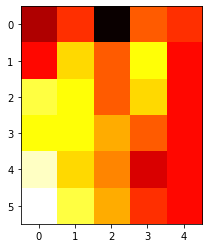

In [36]:
from itertools import product
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("titanic/train.csv")
df


X = train.drop(columns=["Survived"]).to_numpy()
Y = train["Survived"].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
C_list = [1.0,1.8,2.5, 4, 6, 10]
gamma_list = [0.02, 0.1, 0.2, 0.5, 1.2]
score_array = []
for C, gamma in product(C_list, gamma_list):
    cls = SVC(C=C, gamma=gamma)
    cls.fit(X_train, Y_train)
    score = cls.score(X_test, Y_test)
    score_array.append(score)
    print(f"Résultat pour C={C} et gamma={gamma} est : {score}")

score_array = np.array(score_array).reshape(6,5)
print(score_array)
plt.imshow(score_array, cmap="hot")
plt.show()

In [18]:
cls.score(X_test, Y_test)

0.703030303030303

In [12]:
from sklearn.metrics import accuracy_score

Y_pred = cls.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.6495327102803738

In [26]:
cls = SVC(C=2.5, gamma=0.02)
cls.fit(X_train, Y_train)


SVC(C=2.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
cls.predict(np.array([[1,0,30]]))

array([0], dtype=int64)

In [38]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [55]:
from sklearn.preprocessing import OneHotEncoder

df = df.dropna()

enc = OneHotEncoder()
embarked = df["Embarked"].to_numpy()
enc.fit(embarked.reshape(-1,1))
encoded_embarked = enc.transform(embarked.reshape(-1,1)).toarray()
print(encoded_embarked.shape)
embarked_df = pd.DataFrame(np.array(encoded_embarked))

data = df[["Survived", "Pclass", "Sex", "Age"]]
data["Sex"] = data["Sex"].map(lambda x: 0 if x == "male" else 1)
# data["Sex"] = data["Sex"].map(convert_sex_to_int)
data.describe()

embarked_df


(183, 3)


C:\Users\miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
178,0.0,0.0,1.0
179,0.0,0.0,1.0
180,1.0,0.0,0.0
181,0.0,0.0,1.0


In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


(183, 3)
(183, 6)
Résultat pour C=1.0 et gamma=0.02 est : 0.7049180327868853
Résultat pour C=1.0 et gamma=0.1 est : 0.7213114754098361
Résultat pour C=1.0 et gamma=0.2 est : 0.7213114754098361
Résultat pour C=1.0 et gamma=0.5 est : 0.7213114754098361
Résultat pour C=1.0 et gamma=1.2 est : 0.7377049180327869
Résultat pour C=1.8 et gamma=0.02 est : 0.7049180327868853
Résultat pour C=1.8 et gamma=0.1 est : 0.7540983606557377
Résultat pour C=1.8 et gamma=0.2 est : 0.7213114754098361
Résultat pour C=1.8 et gamma=0.5 est : 0.7377049180327869
Résultat pour C=1.8 et gamma=1.2 est : 0.7540983606557377
Résultat pour C=2.5 et gamma=0.02 est : 0.7377049180327869
Résultat pour C=2.5 et gamma=0.1 est : 0.7704918032786885
Résultat pour C=2.5 et gamma=0.2 est : 0.6721311475409836
Résultat pour C=2.5 et gamma=0.5 est : 0.7049180327868853
Résultat pour C=2.5 et gamma=1.2 est : 0.7704918032786885
Résultat pour C=4 et gamma=0.02 est : 0.7540983606557377
Résultat pour C=4 et gamma=0.1 est : 0.7049180327868

C:\Users\miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


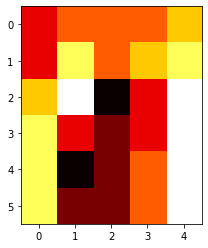

In [4]:
from itertools import product
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.read_csv("titanic/train.csv")
df = df.dropna()

enc = OneHotEncoder()
embarked = df["Embarked"].to_numpy()
enc.fit(embarked.reshape(-1,1))
encoded_embarked = enc.transform(embarked.reshape(-1,1)).toarray()
print(encoded_embarked.shape)

data = df[["Survived", "Pclass", "Sex", "Age"]]
data["Sex"] = data["Sex"].map(lambda x: 0 if x == "male" else 1)
# data["Sex"] = data["Sex"].map(convert_sex_to_int)
data.describe()

X = data.drop(columns=["Survived"]).to_numpy()
Y = data["Survived"].to_numpy()

# ICI fusionner X et embarked_df de manière à avoir les trois nouvelle colonne sur X
X = np.concatenate((X, encoded_embarked), axis=1)
print(X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
C_list = [1.0,1.8,2.5, 4, 6, 10]
gamma_list = [0.02, 0.1, 0.2, 0.5, 1.2]
score_array = []
for C, gamma in product(C_list, gamma_list):
    cls = SVC(C=C, gamma=gamma)
    cls.fit(X_train, Y_train)
    score = cls.score(X_test, Y_test)
    score_array.append(score)
    print(f"Résultat pour C={C} et gamma={gamma} est : {score}")

score_array = np.array(score_array).reshape(6,5)
print(score_array)
plt.imshow(score_array, cmap="hot")
plt.show()



(183, 1)
(183, 4)
Résultat pour C=1.0 et gamma=0.02 est : 0.6721311475409836
Résultat pour C=1.0 et gamma=0.1 est : 0.7540983606557377
Résultat pour C=1.0 et gamma=0.2 est : 0.7540983606557377
Résultat pour C=1.0 et gamma=0.5 est : 0.7540983606557377
Résultat pour C=1.0 et gamma=1.2 est : 0.8032786885245902
Résultat pour C=1.8 et gamma=0.02 est : 0.6721311475409836
Résultat pour C=1.8 et gamma=0.1 est : 0.7540983606557377
Résultat pour C=1.8 et gamma=0.2 est : 0.7540983606557377
Résultat pour C=1.8 et gamma=0.5 est : 0.7540983606557377
Résultat pour C=1.8 et gamma=1.2 est : 0.8032786885245902
Résultat pour C=2.5 et gamma=0.02 est : 0.6721311475409836
Résultat pour C=2.5 et gamma=0.1 est : 0.7540983606557377
Résultat pour C=2.5 et gamma=0.2 est : 0.7540983606557377
Résultat pour C=2.5 et gamma=0.5 est : 0.7540983606557377
Résultat pour C=2.5 et gamma=1.2 est : 0.8032786885245902
Résultat pour C=4 et gamma=0.02 est : 0.7540983606557377
Résultat pour C=4 et gamma=0.1 est : 0.7540983606557

C:\Users\miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


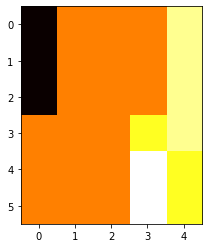

In [10]:
from itertools import product
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
import pandas as pd

df = pd.read_csv("titanic/train.csv")
df = df.dropna()

enc = OrdinalEncoder()
embarked = df["Embarked"].to_numpy()
enc.fit(embarked.reshape(-1,1))
encoded_embarked = enc.transform(embarked.reshape(-1,1))
print(encoded_embarked.shape)

data = df[["Survived", "Pclass", "Sex", "Age"]]
data["Sex"] = data["Sex"].map(lambda x: 0 if x == "male" else 1)
# data["Sex"] = data["Sex"].map(convert_sex_to_int)
data.describe()

X = data.drop(columns=["Survived"]).to_numpy()
Y = data["Survived"].to_numpy()

# ICI fusionner X et embarked_df de manière à avoir les trois nouvelle colonne sur X
X = np.concatenate((X, encoded_embarked), axis=1)
print(X.shape)

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
C_list = [1.0,1.8,2.5, 4, 6, 10]
gamma_list = [0.02, 0.1, 0.2, 0.5, 1.2]
score_array = []
for C, gamma in product(C_list, gamma_list):
    cls = SVC(C=C, gamma=gamma)
    cls.fit(X_train, Y_train)
    score = cls.score(X_test, Y_test)
    score_array.append(score)
    print(f"Résultat pour C={C} et gamma={gamma} est : {score}")

score_array = np.array(score_array).reshape(6,5)
print(score_array)
plt.imshow(score_array, cmap="hot")
plt.show()



In [9]:
data.describe()

,Survived,Pclass,Sex,Age
count,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,0.480874,35.674426
std,0.470725,0.515187,0.501005,15.643866
min,0.000000,1.000000,0.000000,0.920000
25%,0.000000,1.000000,0.000000,24.000000
50%,1.000000,1.000000,0.000000,36.000000
75%,1.000000,1.000000,1.000000,47.500000
max,1.000000,3.000000,1.000000,80.000000
